### Assignment - DS - Mechademy - Shubham Mahobia


In [154]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px


##### Exploring the Dataset for analysis



In [155]:
df = pd.read_csv('data/data.csv')


In [156]:
df.head(10)


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50.0,40.0,19.89,46.0266666666667,19.2,44.500000,19.79,44.933333,18.890000,...,17.000000,NaN,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,NaN
6,2016-01-11 18:00:00,60.0,50.0,19.89,45.7666666666667,19.2,44.500000,19.79,44.900000,35.921144,...,17.000000,NaN,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60.0,50.0,19.8566666666667,45.56,19.2,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,NaN,40.0,19.79,45.5975,19.2,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,-32.098095,31.455702,31.455702
9,2016-01-11 18:30:00,70.0,40.0,19.8566666666667,46.09,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,NaN,4.650000,3.089314,3.089314


In [157]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [158]:
df.describe()


,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [159]:
#Converting the columns into correct data type for further use
df['timestamp'] = pd.to_datetime(df['timestamp'])
numeric_columns = [
    'equipment_energy_consumption',
    'lighting_energy',
    'zone1_temperature', 'zone2_temperature', 'zone3_temperature',
    'zone4_temperature', 'zone5_temperature', 'zone6_temperature',
    'zone7_temperature', 'zone8_temperature', 'zone9_temperature',
    'zone1_humidity', 'zone2_humidity', 'zone3_humidity',
    'zone4_humidity', 'zone5_humidity', 'zone6_humidity',
    'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_temperature', 'outdoor_humidity', 'atmospheric_pressure',
    'wind_speed', 'visibility_index', 'dew_point',
    'random_variable1', 'random_variable2'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [160]:
missing_values = df.isnull().sum()
print(missing_values)



timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [161]:
#As there are null values in the output column[equipment_energy_consumption = 844] as well so to 
#match the count of the output column with the input column we will drop the null values

#Reason - If the output column has null values then the model will not be able to predict the output for the input data

# Drop rows where equipment_energy_consumption is null
df.dropna(subset=['equipment_energy_consumption'], inplace=True)

In [162]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
lighting_energy         806
zone1_temperature       891
zone1_humidity          843
zone2_temperature       876
zone2_humidity          823
zone3_temperature       757
zone3_humidity          818
zone4_temperature       771
zone4_humidity          739
zone5_temperature       786
zone5_humidity          749
zone6_temperature       799
zone6_humidity          796
zone7_temperature       738
zone7_humidity          765
zone8_temperature       801
zone8_humidity          742
zone9_temperature       728
zone9_humidity          832
outdoor_temperature     766
atmospheric_pressure    796
outdoor_humidity        757
wind_speed              779
visibility_index        768
dew_point               768
random_variable1        783
random_variable2        778
dtype: int64


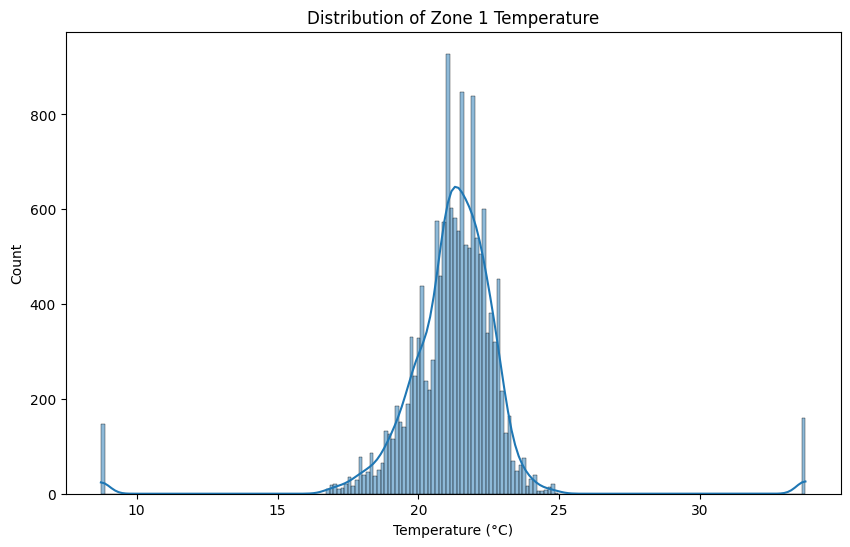

In [163]:


# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='zone1_temperature', kde=True)
plt.title('Distribution of Zone 1 Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()


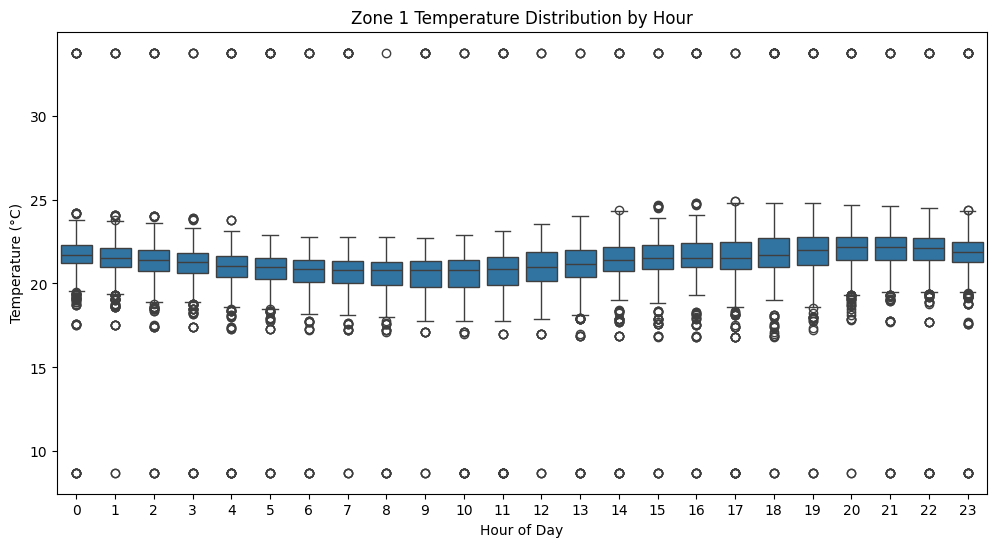

In [164]:
df['hour'] = df['timestamp'].dt.hour

# Hourly temperature patterns
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='zone1_temperature', data=df)
plt.title('Zone 1 Temperature Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.show()

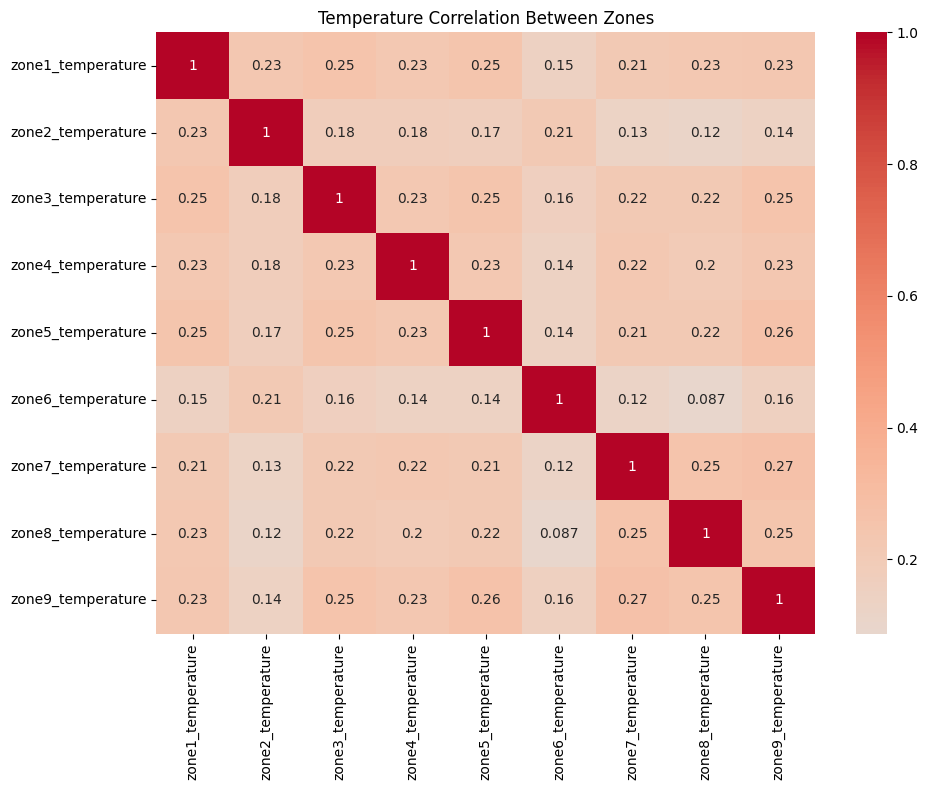

In [165]:
# Correlation heatmap for all zone temperatures
temp_columns = [f'zone{i}_temperature' for i in range(1, 10)]
correlation_matrix = df[temp_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Temperature Correlation Between Zones')
plt.tight_layout()
plt.show()

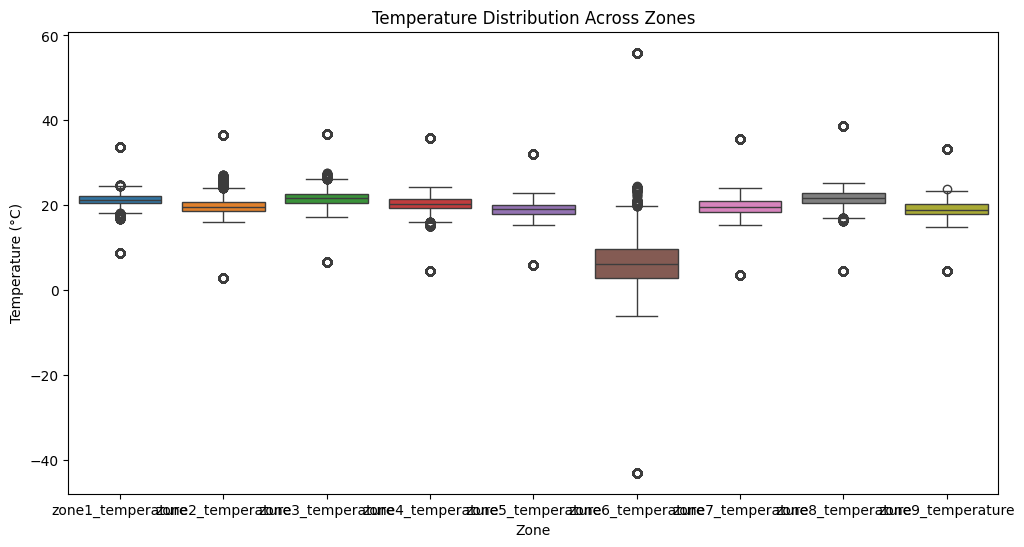

In [166]:
#Exploring different ranges of temprature in different zones

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[f'zone{i}_temperature' for i in range(1, 10)]])
plt.title('Temperature Distribution Across Zones')
plt.xlabel('Zone')
plt.ylabel('Temperature (°C)')
plt.show()


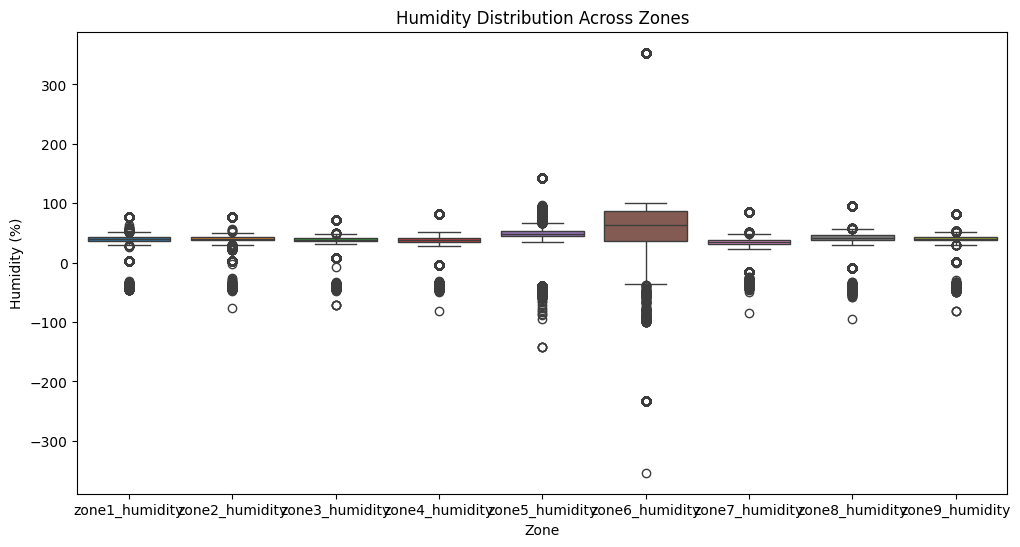

In [167]:
#Exploring different humidity levels in different zones 

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[f'zone{i}_humidity' for i in range(1, 10)]])
plt.title('Humidity Distribution Across Zones')
plt.xlabel('Zone')
plt.ylabel('Humidity (%)')
plt.show()

In [168]:
#Now handling the columns with missing values in it - 
#For temprature we are using hourly mean as
temperature_cols = [f'zone{i}_temperature' for i in range(1, 10)] + ['outdoor_temperature']
for col in temperature_cols:
        hourly_mean = df.groupby('hour')[col].transform('mean')
        df[col] = df[col].fillna(hourly_mean)
        df[col] = df[col].fillna(df[col].mean())

In [169]:
#Now same for the humidity - Columns -
# Remove invalid values (By observation the humiditiy data is provided in the percentage(%) 
# as mentioned in the data description file but some values are negative 
# as well which makes the data invalid so for that imputing those values 
# the median value - We can remove it as well but the issue the values 
# are in large number and will be large data loss for training)
humidity_cols = [f'zone{i}_humidity' for i in range(1, 10)] + ['outdoor_humidity']
for col in humidity_cols:
        # Remove invalid values
        df[col] = df[col].mask((df[col] < 0) | (df[col] > 100))
        hourly_mean = df.groupby('hour')[col].transform('mean')
        df[col] = df[col].fillna(hourly_mean)
        df[col] = df[col].fillna(df[col].mean())
        df[col] = df[col].clip(0, 100)

In [170]:
#for these columns time does not take much importance so we can directly replace Nan value with mean
weather_cols = ['atmospheric_pressure', 'wind_speed', 'visibility_index', 'dew_point']
for col in weather_cols:
        df[col] = df[col].fillna(df[col].mean())

count    15139.000000
mean         3.919199
std         14.675775
min        -86.002966
25%          0.000000
50%          0.000000
75%          0.000000
max         86.002966
Name: lighting_energy, dtype: float64


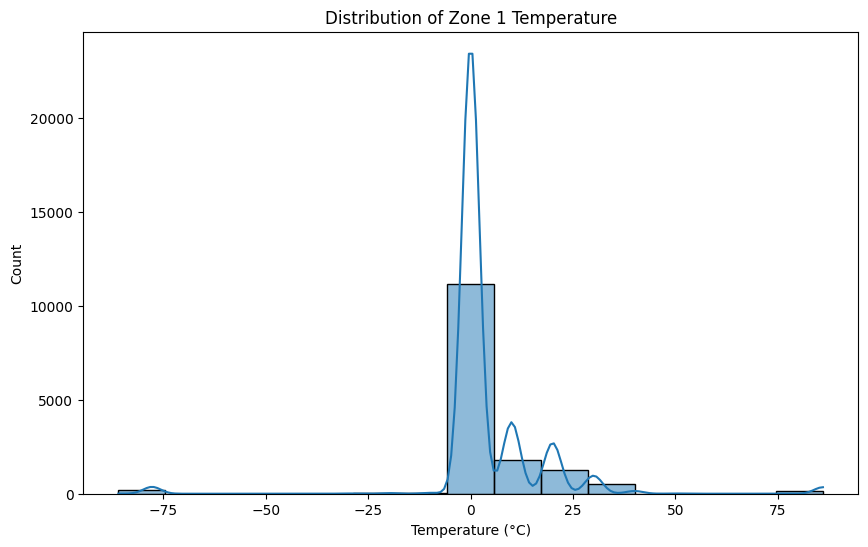

In [171]:
print(df['lighting_energy'].describe())
# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lighting_energy', kde=True)
plt.title('Distribution of Zone 1 Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()

In [172]:
df.loc[df['lighting_energy'] < 0, 'lighting_energy'] = np.nan  # Mark as missing as the consuption cannot be negative 

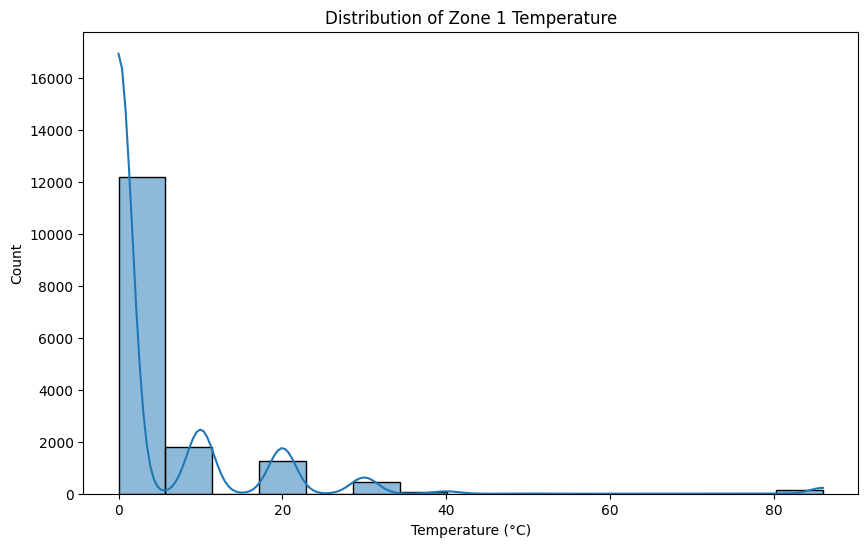

In [175]:
# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lighting_energy', kde=True)
plt.title('Distribution of Zone 1 Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()

In [174]:
median_value = df['lighting_energy'].median()
df['lighting_energy'] = df['lighting_energy'].fillna(median_value)

In [177]:
missing_values = df.isnull().sum()
print(missing_values)
#Now only the random value have missing data rest of the data is fixed

timestamp                         0
equipment_energy_consumption      0
lighting_energy                   0
zone1_temperature                 0
zone1_humidity                    0
zone2_temperature                 0
zone2_humidity                    0
zone3_temperature                 0
zone3_humidity                    0
zone4_temperature                 0
zone4_humidity                    0
zone5_temperature                 0
zone5_humidity                    0
zone6_temperature                 0
zone6_humidity                    0
zone7_temperature                 0
zone7_humidity                    0
zone8_temperature                 0
zone8_humidity                    0
zone9_temperature                 0
zone9_humidity                    0
outdoor_temperature               0
atmospheric_pressure              0
outdoor_humidity                  0
wind_speed                        0
visibility_index                  0
dew_point                         0
random_variable1            